<a href="https://colab.research.google.com/github/GuruYoda/DataScience/blob/main/BostonHousingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=9d71fe8bb5a759dfd1dec59324edcf8b902b701babf0850f859221ec5141e4f5
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [1]:
import numpy as np
import pandas as pd

from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [3]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [4]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
# prompt: Boston housing dataset explained

Boston.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
np.shape(Boston)

(506, 13)

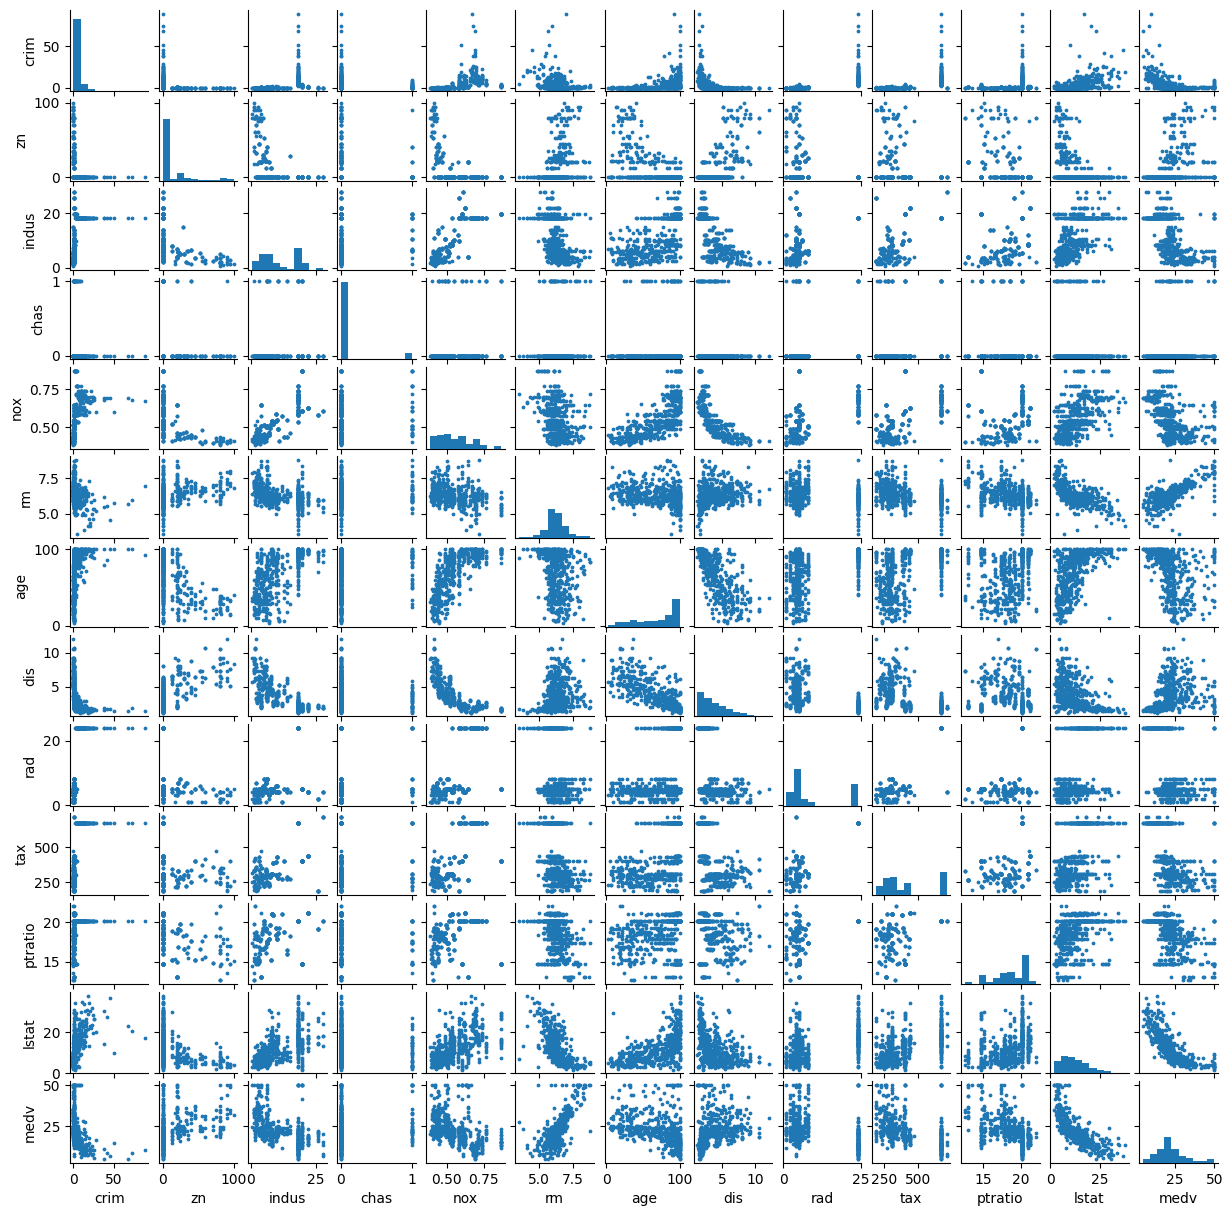

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(Boston)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(plt.scatter, s=3)
g.fig.set_size_inches(12, 12)

In [14]:
# prompt: Findings from the above plot

1. **Positive Correlations:**
    - The scatter plots show positive correlations between several features. For example:
        - `lstat` and `medv`: Higher values of `lstat` (lower socioeconomic status) tend to correspond with lower values of `medv` (median house value).
        - `rm` and `medv`: Higher values of `rm` (average number of rooms per dwelling) tend to correspond with higher values of `medv`.
2. **Negative Correlations:**
    - There are also some negative correlations visible in the plot. For example:
        - `tax` and `medv`: Higher values of `tax` (property tax rate per $10,000) tend to correspond with lower values of `medv`.
3. **Clustering:**
    - Some features exhibit clustering behavior. For instance, the scatter plot for `lstat` and `medv` shows two distinct clusters: one with high `lstat` and low `medv`, and another with low `lstat` and high `medv`.
4. **Distribution of Features:**
    - The histograms on the diagonal of the plot reveal the distribution of each feature. For example, `medv` appears to have a roughly bell-shaped distribution, while `lstat` has a skewed distribution with a longer tail towards higher values.

These findings suggest that there are various relationships between different features in the Boston housing dataset. These relationships could be further explored and utilized for tasks like predicting housing prices or understanding the factors that influence housing values in Boston.

SyntaxError: invalid syntax (<ipython-input-14-fa3c5a61eb55>, line 3)

In [16]:
Boston.corrwith(Boston['crim']).sort_values()

medv      -0.388305
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
crim       1.000000
dtype: float64

In [ ]:
# prompt: Explain the above finding

The provided code snippet calculates the correlation coefficients between each feature in the Boston housing dataset and the `crim` feature. The results are then sorted in ascending order.

The output shows that the `crim` feature has a strong positive correlation with `nox` and `indus`, indicating that areas with higher crime rates tend to have higher levels of nitrogen oxides and industrial activity. On the other hand, `crim` has a strong negative correlation with `chas` (Charles River dummy variable), `zn` (proportion of residential land zoned for lots over 25,000 sq.ft.), and `rad` (index of accessibility to radial highways), suggesting that areas with higher crime rates are less likely to be near the Charles River, have larger residential lots, or have easy access to highways.

These findings suggest that the `crim` feature is associated with certain characteristics of the Boston housing market. For example, areas with higher crime rates tend to be more industrialized and have lower-quality housing stock. This information could be useful for understanding the factors that influence housing prices and making informed decisions about where to live or invest in property.

In [32]:
a = Boston['crim'].nlargest(5).index

In [33]:
Boston.iloc[a, :]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0


In [34]:
Boston.iloc[Boston['tax'].nlargest(5).index, :]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,13.35,20.1


In [36]:
Boston.iloc[Boston['ptratio'].nlargest(5).index, :]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,8.05,18.2
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,5.57,20.6
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
128,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3


In [38]:
b1 = Boston[Boston['chas'] == 1]

In [45]:
b1.shape


(35, 13)

In [46]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [47]:
Boston["medv"].min()

5.0

In [49]:
Boston['medv'].nsmallest(1).index

Int64Index([398], dtype='int64')

In [50]:
Boston.iloc[Boston['medv'].nsmallest(1).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0


In [53]:
Boston.iloc[398,:]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [54]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [56]:
Boston['rm'] >= 7

0      False
1      False
2       True
3      False
4       True
       ...  
501    False
502    False
503    False
504    False
505    False
Name: rm, Length: 506, dtype: bool

In [58]:
# prompt: print all rows sastisfying a condition on a column

# Select rows where the value in the "rm" column is greater than or equal to 7
filtered_rows = Boston[Boston['rm'] >= 7]

# Print the filtered rows
filtered_rows.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,5.474062,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,16.740000,50.000000


In [59]:
# prompt: print all rows sastisfying a condition on a column

# Select rows where the value in the "rm" column is greater than or equal to 7
filtered_rows = Boston[Boston['rm'] >= 8]

# Print the filtered rows
filtered_rows.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
